In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import Huber

In [2]:
df = pd.read_csv(r"C:\Users\prajwal\Downloads\TSLA_stock_data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
X

,Date,Open,High,Low,Close,Adj Close
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000
...,...,...,...,...,...,...
3587,2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005
3588,2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989
3589,2024-10-02,247.550003,251.160004,241.500000,249.020004,249.020004
3590,2024-10-03,244.479996,249.789993,237.809998,240.660004,240.660004


In [7]:
y

0       281494500
1       257806500
2       123282000
3        77097000
4       103003500
          ...    
3587     80705700
3588     87397600
3589     93983900
3590     80729200
3591     86573200
Name: Volume, Length: 3592, dtype: int64

In [8]:
df['Date'] = df['Date'].str.replace('-', '').astype(float)

df['Date'].head()

0    20100629.0
1    20100630.0
2    20100701.0
3    20100702.0
4    20100706.0
Name: Date, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3592 non-null   float64
 1   Open       3592 non-null   float64
 2   High       3592 non-null   float64
 3   Low        3592 non-null   float64
 4   Close      3592 non-null   float64
 5   Adj Close  3592 non-null   float64
 6   Volume     3592 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 196.6 KB


<Axes: xlabel='Adj Close', ylabel='Open'>

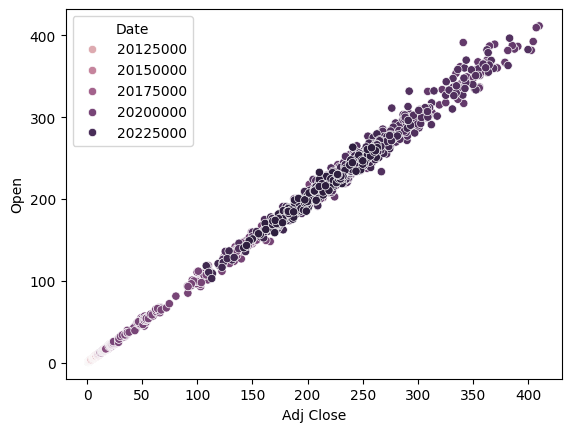

In [10]:
import seaborn as sns
sns.scatterplot(x = df['Adj Close'], y = df['Open'], hue = df['Date'])

<Axes: xlabel='Adj Close', ylabel='Close'>

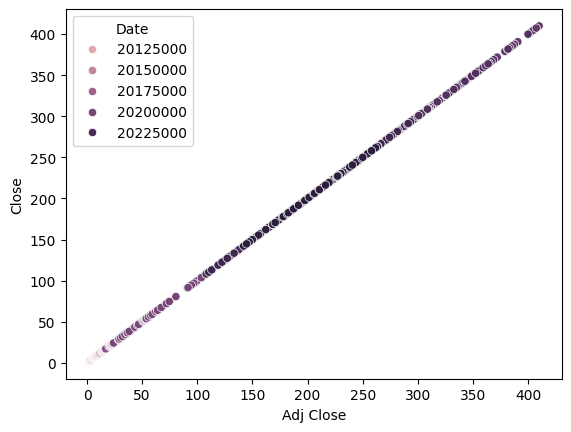

In [11]:
sns.scatterplot(x = df['Adj Close'], y = df['Close'], hue = df['Date'])

<Axes: xlabel='Date', ylabel='Adj Close'>

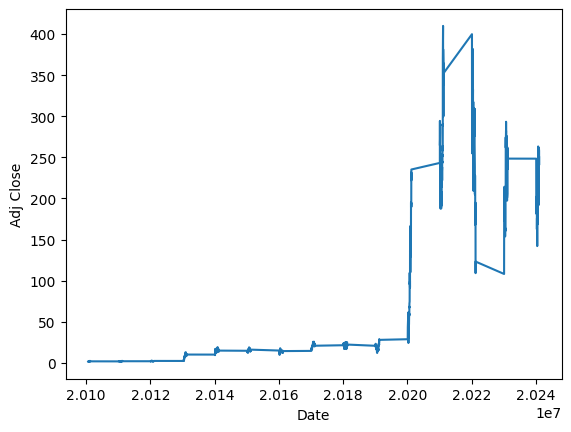

In [12]:
sns.lineplot(x = df['Date'], y = df['Adj Close'])

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,20100629.0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,20100630.0,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,20100701.0,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,20100702.0,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,20100706.0,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [14]:
X_new = df.iloc[:,0:-1]
y_new = df.iloc[:,-1]

In [15]:
X_new

,Date,Open,High,Low,Close,Adj Close
0,20100629.0,1.266667,1.666667,1.169333,1.592667,1.592667
1,20100630.0,1.719333,2.028000,1.553333,1.588667,1.588667
2,20100701.0,1.666667,1.728000,1.351333,1.464000,1.464000
3,20100702.0,1.533333,1.540000,1.247333,1.280000,1.280000
4,20100706.0,1.333333,1.333333,1.055333,1.074000,1.074000
...,...,...,...,...,...,...
3587,20240930.0,259.040009,264.859985,255.770004,261.630005,261.630005
3588,20241001.0,262.670013,263.980011,248.529999,258.019989,258.019989
3589,20241002.0,247.550003,251.160004,241.500000,249.020004,249.020004
3590,20241003.0,244.479996,249.789993,237.809998,240.660004,240.660004


In [16]:
y_new

0       281494500
1       257806500
2       123282000
3        77097000
4       103003500
          ...    
3587     80705700
3588     87397600
3589     93983900
3590     80729200
3591     86573200
Name: Volume, Length: 3592, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2873, 6) (719, 6) (2873,) (719,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X_train

,Date,Open,High,Low,Close,Adj Close
1123,20141212.0,13.654667,14.112000,13.633333,13.800000,13.800000
177,20110311.0,1.590000,1.616667,1.568667,1.604667,1.604667
1475,20160509.0,14.381333,14.410000,13.786667,13.928000,13.928000
1108,20141120.0,16.530001,16.728666,16.400000,16.580667,16.580667
1407,20160201.0,12.584000,13.301333,12.183333,13.129333,13.129333
...,...,...,...,...,...,...
1130,20141223.0,14.920667,14.954667,14.634667,14.731333,14.731333
1294,20150819.0,17.355333,17.376667,17.001333,17.016666,17.016666
860,20131126.0,7.958667,8.181333,7.740000,8.033333,8.033333
3507,20240605.0,175.350006,176.149994,172.130005,175.000000,175.000000


In [21]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3525718822965830.5
R-squared: 0.3838308096632722


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = rf_regressor.score(X_test, y_test)
print(f'R^2 Score: {r2}')

Mean Squared Error: 1596174248081573.2
R^2 Score: 0.7210459927574633


In [34]:
importances = rf_regressor.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feature_importance)

Date         0.383856
High         0.280655
Low          0.133817
Open         0.086733
Adj Close    0.059120
Close        0.055820
dtype: float64
